In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path
import pandas as pd
import create_dataset
from create_dataset import * 
import load_data
from load_data import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [ ]:
np.random.seed(42)

In [ ]:
ml_folder = Path('/content/drive/MyDrive/ML projet')
ml_folder.exists()
data_path = ml_folder/'DataLFP.mat'

In [ ]:
class random_estimator():

  def __init__(self, param=None):
    pass
  
  def get_params(self, deep):
    return {}

  def fit(self, X,y):
    return self
  
  def predict(self, X):
    return np.random.randint(2, size=(X.shape[0]))

In [ ]:
X_wS1, y_wS1 = preprocess_dataset(data_path, 'wS1', start=2.5, select_amplitude=[2,3])
X_wS1.shape, y_wS1.shape

In [ ]:
X_mPFC, y_mPFC = preprocess_dataset(data_path, 'mPFC', start=2.5, select_amplitude=[2,3])
X_tjM1, y_tjM1 = preprocess_dataset(data_path, 'tjM1', start=2.5, select_amplitude=[2,3])

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

model = SVC(gamma='auto', C=1)
def eval_model(model, X, y, cv=20):
  return cross_val_score(model, X, y, cv=cv, scoring='accuracy')

In [ ]:
def add_test_to_results(results, area, model, accs):
  for acc in accs:
    results = results.append({'area' : area, 'model' : model, 'accuracy' : acc},ignore_index=True)
  return results

In [ ]:
areas = ['wS1', 'tjM1', 'mPFC']
datas = [(X_wS1,y_wS1), (X_tjM1, y_tjM1), (X_mPFC,y_mPFC)]
results = pd.DataFrame(columns=['area', 'model', 'accuracy']) 

for area, data in zip(areas,datas):
  X, y = data
  accs = eval_model(model, X, y, cv=20)
  results = add_test_to_results(results, area, 'svm', accs) 

In [ ]:
for area, data in zip(areas,datas):
  X, y = data
  accs = eval_model(random_model, X, y, cv=50)
  results = add_test_to_results(results, area, 'random prediction', accs)

Text(0.5, 1.0, 'baseline')

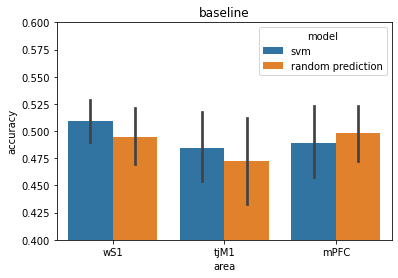

In [ ]:
##hue control color and x the axis a
sn.barplot(x="area", y="accuracy", ci=95, hue="model", data=results)
plt.ylim([0.4,0.6])
plt.title('baseline')

In [ ]:
results.groupby(['area','model'], axis=0).apply(lambda x:x.accuracy.mean()).reset_index()

,area,model,0
0,mPFC,random prediction,0.498154
1,mPFC,svm,0.489267
2,tjM1,random prediction,0.472879
3,tjM1,svm,0.484598
4,wS1,random prediction,0.495000
5,wS1,svm,0.509402
